In [1]:
from import_functions_generic import *

## Classical parameters

In [2]:
deg2rad = np.pi/180

## Object parameters

In [3]:
class Object:
    d_object = 107.4 # pc
name_object = 'HD 120326' 
#r_disc_warm, i_disc_warm, PA_disc_warm = au2sep(8), 30*deg2rad, 97   # arcsec, rad, deg
#r_disc_cold, i_disc_cold, PA_disc_cold = au2sep(180), 30*deg2rad, 97 # arcsec, rad, deg

## Instrumental parameters

In [4]:
INSTRU = ['HST-STIS','SPHERE-IRDIS','SPHERE-IRDIS']
BAND = ['0.2--1 $\mu$m', '1.6 $\mu$m', '1.6 $\mu$m']
pixarc_hst, pixarc_ird, pixarc_ifs = 0.05078e3, 12.25, 7.46
r_IWA_ird, r_IWA_ifs = 100, 100 # mas
IWA_size = r_IWA_ird/1000 # arcsec

## Methodological parameters

In [5]:
algo_reduction = ''
observing_mode = ''

## Global parameters for the images

In [118]:
folder = 'data/'
im_1 = fits.getdata(folder + 'HST/im_obs_mask_min_final.fits')
#im_1 = fits.getdata(folder + 'HST/im_cadi_derot_smart.fits')
im_1 = fits.getdata(folder + 'HST/IM12_derot.fits')
im_1 = fits.getdata(folder + 'HST/IM12_derot_mask+spiders.fits')

crop_IRDAP = 425
im_2 = fits.getdata(folder + 'IRDIS_polar/HIP67497_2018-06-02_Q_phi_star_pol_subtr.fits')
im_2 = im_2[crop_IRDAP:-crop_IRDAP, crop_IRDAP:-crop_IRDAP]

crop_PCA = 225
im_3 = fits.getdata(folder + 'IRDIS_ti/2019-07-09_IRDIS_BB_H_both_channels_combine_after_softsorting_channel1_cube_im_pca.fits')
im_3 = im_3[9][crop_PCA:-crop_PCA, crop_PCA:-crop_PCA]
#im_composite = fits.getdata('im_composite.fits')#[0,0,60:-60,60:-60]
IM = [im_1, im_2, im_3] #, im_composite]

In [119]:
np.shape(im_3)

(174, 174)

In [120]:
## esthetic
fs = 12
fp= FontProperties()
fp.set_size(fs)
color_b = 'r'

# Plot Images

In [121]:
save_filt_i = 1

### Image 1

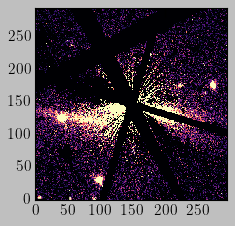

In [122]:
i = 0
#im, band, x_obj, y_obj = IM[i], BAND[i], X_OBJ[i], Y_OBJ[i]
im, band = IM[i], BAND[i] 
h_larger, w_larger = np.shape(IM[i])[0], np.shape(IM[i])[1]
vmin, vmax = 0, 50
plt.imshow(im,vmin=vmin,vmax=vmax,origin='lower')

### Image 2

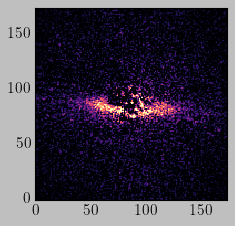

In [123]:
i = 1
im, band = IM[i], BAND[i] 
h_smaller,w_smaller = np.shape(IM[i])[0], np.shape(IM[i])[1]
vmin, vmax = 0, 30 #(np.nanmedian(im)+np.nanmax(im))*0.7/2
plt.imshow(im,vmin=vmin,vmax=vmax,origin='lower')

### Image 3

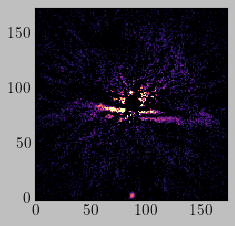

In [124]:
i = 2
im, band = IM[i], BAND[i] 
h_smaller,w_smaller = np.shape(IM[i])[0], np.shape(IM[i])[1]
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))*0.5/2
plt.imshow(im,vmin=vmin,vmax=vmax,origin='lower')

### Rescale

In [125]:
# interpolate images
# interpolate images
im_larger = im_1
im_larger[im_larger<0] = 0
im_larger = im_larger/ np.nanmax(im_larger)

im_smaller = im_2
im_smaller[im_smaller<0] = 0
im_smaller = im_smaller/np.nanmax(im_smaller)
im_smaller = -im_smaller

pixarc_smaller = pixarc_ird
pixarc_larger = pixarc_hst

# Large image
w_largerpix, h_largerpix = w_larger*pixarc_larger, h_larger*pixarc_larger # fov in pixel * mas/pixels = fpv o, mas
print("Shape of the large image: {:.0f} x {:.0f} mas^2".format(w_largerpix, h_largerpix))

factor = 10

# small image
w_smallerpix, h_smallerpix = w_smaller*pixarc_smaller, h_smaller*pixarc_smaller
print("Shape of the small image: {:.0f} x {:.0f} mas^2".format( w_smallerpix, h_smallerpix))


scale_small2large = w_largerpix/w_smallerpix
dx = (w_largerpix-w_smallerpix)//(2*factor) ; dy = (h_largerpix-h_smallerpix)//(2*factor)
print('The fov of the small image should be multiplied by {:.0f} to reach the fov of the large image: {:.0f} x {:.0f} mas^2'.format(scale_small2large, 
                                                w_smallerpix*scale_small2large, h_smallerpix*scale_small2large))

Shape of the large image: 15031 x 15031 mas^2
Shape of the small image: 2132 x 2132 mas^2
The fov of the small image should be multiplied by 7 to reach the fov of the large image: 15031 x 15031 mas^2


In [126]:
from scipy import interpolate

In [127]:
im_larger_nonan   = np.where(np.isnan(im_larger), 0, im_larger) # could be some nan in the image 'im'
im_larger_interpo = interpolate.RectBivariateSpline(np.arange(0,h_larger,1),np.arange(0,w_larger,1),im_larger_nonan) # check ?

im_smaller_nonan   = np.where(np.isnan(im_smaller), 0, im_smaller) # could be some nan in the image 'im'
im_smaller_interpo = interpolate.RectBivariateSpline(np.arange(0,h_smaller,1),np.arange(0,w_smaller,1),im_smaller_nonan) # check ?

h_scaled, w_scaled = int(h_largerpix/factor), int(w_largerpix/factor)

im_large_scaled = np.zeros((h_scaled,w_scaled))
im_small_scaled = np.zeros((h_scaled,w_scaled))

for x in range(w_scaled):
    for y in range(h_scaled):
        im_large_scaled[y,x] = im_larger_interpo(y*factor/(pixarc_larger),x*factor/(pixarc_larger))
        
        if  dx <= x and x <= w_scaled-dx and  dy <= y and y <= h_scaled-dy : 
            im_small_scaled[y,x] = im_smaller_interpo((y-dy)*factor/(pixarc_smaller),(x-dx)*factor/(pixarc_smaller))*10
            
im_large_scaled[im_large_scaled<0] = 0

## Images rescaled (just disks)

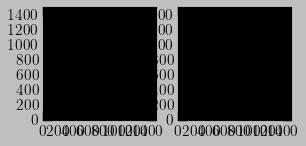

In [128]:
im1_scaled = im_large_scaled ; im2_scaled = im_small_scaled
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))*0.7/2
fig,ax = plt.subplots(1,2)
#ellipse = Circle((xb,yb),20,ec='w',fc='None',ls='-',lw=0.5)
#ax[1].add_patch(ellipse)
ax[0].imshow(im1_scaled,vmin=0, vmax=50, origin='lower',interpolation='None')
ax[1].imshow(im2_scaled,vmin=0, vmax=100, origin='lower',interpolation='None')
plt.show()

In [129]:
print('shape of im2 rescaled: {} while before rescaling it was {}'.format(w_scaled, h_scaled))
    #np.shape(im2_scaled), w_smaller))

shape of im2 rescaled: 1503 while before rescaling it was 1503


In [130]:
# Note: w_smaller = np.shape(im_2)
# Note: w_scaled = np.shape(im2_scaled)[1]

deltaw_size_box =  100
deltah_size_box = - 50 # what we remove compare to w_size_box
w_copy_deb = (w_scaled-w_smaller + deltaw_size_box)//2
w_copy_fin = w_copy_deb + w_smaller - deltaw_size_box
h_copy_deb, h_copy_fin = w_copy_deb+deltah_size_box, w_copy_fin-deltah_size_box
mid = h_scaled//2

In [131]:
w_copy_deb, w_copy_fin

(714, 788)

In [132]:
h_copy_deb, h_copy_fin

(664, 838)

In [133]:
im_composite = np.copy(im_large_scaled)/(np.nanmax(im_large_scaled)*0.05)
# Convert all HST values into negatives ones; but before, set negative values to 0
#im_composite[im_composite<0] = 0
#im_composite -= np.nanmax(im_composite)

im_composite[w_copy_deb:w_copy_fin,h_copy_deb:h_copy_fin] = 0.2*im2_scaled[w_copy_deb:w_copy_fin, h_copy_deb:h_copy_fin]/np.nanmax(im2_scaled) 

# Write .fits
fits.writeto('im_composite_HST_IRDIS_polar.fits', im_composite, overwrite=True)

### Plot nicely the composite image
Here the image which we want to plot nicely: 

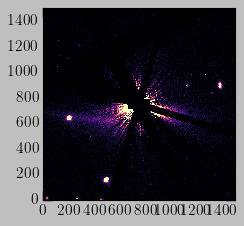

In [134]:
i = 0
crop = 100
im = im_composite #IM[i]
h, w = np.shape(im)
vmin, vmax = 0, 0.5
plt.imshow(im,vmin=vmin,vmax=vmax,origin='lower',interpolation='None')

## Repeat for HST+SPHERE total intensity image

### Rescale

In [151]:
# interpolate images
im_larger = im_1
im_larger[im_larger<0] = 0
im_larger = im_larger/ np.nanmax(im_larger)

im_smaller = im_3
im_smaller[im_smaller<0] = 0
im_smaller = im_smaller/np.nanmax(im_smaller)
im_smaller = -im_smaller

pixarc_smaller = pixarc_ird
pixarc_larger = pixarc_hst

# Large image
w_largerpix, h_largerpix = w_larger*pixarc_larger, h_larger*pixarc_larger # fov in pixel * mas/pixels = fpv o, mas
print("Shape of the large image: {:.0f} x {:.0f} mas^2".format(w_largerpix, h_largerpix))

factor = 10

# small image
w_smallerpix, h_smallerpix = w_smaller*pixarc_smaller, h_smaller*pixarc_smaller
print("Shape of the small image: {:.0f} x {:.0f} mas^2".format( w_smallerpix, h_smallerpix))


scale_small2large = w_largerpix/w_smallerpix
dx = (w_largerpix-w_smallerpix)//(2*factor) ; dy = (h_largerpix-h_smallerpix)//(2*factor)
print('The fov of the small image should be multiplied by {:.0f} to reach the fov of the large image: {:.0f} x {:.0f} mas^2'.format(scale_small2large, 
                                                w_smallerpix*scale_small2large, h_smallerpix*scale_small2large))

Shape of the large image: 15031 x 15031 mas^2
Shape of the small image: 2132 x 2132 mas^2
The fov of the small image should be multiplied by 7 to reach the fov of the large image: 15031 x 15031 mas^2


In [152]:
factor

10

In [159]:
h_largerpix/factor #* pixarc_hst*pixarc_ird

1503.0880000000002

In [158]:
pixarc_hst

50.78

In [154]:
im_larger_nonan   = np.where(np.isnan(im_larger), 0, im_larger) # could be some nan in the image 'im'
im_larger_interpo = interpolate.RectBivariateSpline(np.arange(0,h_larger,1),np.arange(0,w_larger,1),im_larger_nonan) # check ?

im_smaller_nonan   = np.where(np.isnan(im_smaller), 0, im_smaller) # could be some nan in the image 'im'
im_smaller_interpo = interpolate.RectBivariateSpline(np.arange(0,h_smaller,1),np.arange(0,w_smaller,1),
                                                     im_smaller_nonan) # check ?

h_scaled, w_scaled = int(h_largerpix/factor), int(w_largerpix/factor)

im_large_scaled = np.zeros((h_scaled,w_scaled))
im_small_scaled = np.zeros((h_scaled,w_scaled))

for x in range(w_scaled):
    for y in range(h_scaled):
        im_large_scaled[y,x] = im_larger_interpo(y*factor/(pixarc_larger),x*factor/(pixarc_larger))
        
        if  dx <= x and x <= w_scaled-dx and  dy <= y and y <= h_scaled-dy : 
            im_small_scaled[y,x] = im_smaller_interpo((y-dy)*factor/(pixarc_smaller),(x-dx)*factor/(pixarc_smaller))*10
            

im_large_scaled[im_large_scaled<0] = 0

In [ ]:
# Figure
im1_scaled = im_large_scaled ; im2_scaled = im_small_scaled
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))*0.7/2
fig,ax = plt.subplots(1,2)
#ellipse = Circle((xb,yb),20,ec='w',fc='None',ls='-',lw=0.5)
#ax[1].add_patch(ellipse)
ax[0].imshow(im1_scaled,vmin=0, vmax=50, origin='lower',interpolation='None')
ax[1].imshow(im2_scaled,vmin=0, vmax=np.nanmax(im2_scaled)*0.1, origin='lower',interpolation='None')
plt.show()

In [139]:
# Note: w_smaller = np.shape(im_2)
# Note: w_scaled = np.shape(im2_scaled)[1]

deltaw_size_box =  100
deltah_size_box = - 50 # what we remove compare to w_size_box
w_copy_deb = (w_scaled-w_smaller + deltaw_size_box)//2
w_copy_fin = w_copy_deb + w_smaller - deltaw_size_box
h_copy_deb, h_copy_fin = w_copy_deb+deltah_size_box, w_copy_fin-deltah_size_box
mid = h_scaled//2

In [140]:
im_composite = np.copy(im_large_scaled)/(np.nanmax(im_large_scaled)*0.05)
# Convert all HST values into negatives ones; but before, set negative values to 0
#im_composite[im_composite<0] = 0
#im_composite -= np.nanmax(im_composite)

im_composite[w_copy_deb:w_copy_fin,h_copy_deb:h_copy_fin] = 0.2*im2_scaled[w_copy_deb:w_copy_fin, h_copy_deb:h_copy_fin]/np.nanmax(im2_scaled) 

# Write .fits
fits.writeto('im_composite_HST_IRDIS_ti.fits', im_composite, overwrite=True)

In [141]:
# custom: some positive values got negative... probably during the interpolation process 

### Plot nicely the composite image
Here the image which we want to plot nicely: 

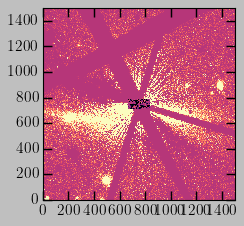

In [142]:
i = 0
crop = 100
im = im_composite #IM[i]
h, w = np.shape(im)
vmin, vmax = -0.05, 0.05
plt.imshow(im,vmin=vmin,vmax=vmax,origin='lower',interpolation='None')
plt.savefig('test.pdf')

## Images rescaled (alternative if there is a bright planet)

si c'est le point le plus lumineux de l'image, methode pour trouver x_planet et y_planet

In [ ]:
np.max(im2_scaled)

In [ ]:
ymax = np.argmax(im2_scaled)//h_scaled
ymax

In [ ]:
xmax = np.argmax(im2_scaled[ymax])
xmax

In [ ]:
np.max(im2_scaled[ymax])

on verifie la distance de la planete

In [ ]:
distance(xmax,ymax,x0=w_scaled//2,y0=h_scaled//2,pixarc=factor)

If I already have the coordinates of the planet:

In [ ]:
xb, yb = 500+66, 500+48
im2_scaled[yb,xb]
distance(xb,yb,x0=w_scaled//2,y0=h_scaled//2,pixarc=factor)

In [ ]:
im1_scaled = im_large_scaled ; im2_scaled = im_small_scaled
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))*0.7/2
fig,ax = plt.subplots(1,2)
#ellipse = Circle((xb,yb),20,ec='w',fc='None',ls='-',lw=0.5)
#ax[1].add_patch(ellipse)
ax[0].imshow(im1_scaled,vmin=0, vmax=50, origin='lower',interpolation='None')
ax[1].imshow(im2_scaled,vmin=0, vmax=100, origin='lower',interpolation='None')
plt.show()

In [ ]:
size_box = 7
w_copy_deb,w_copy_fin, h_copy_deb, h_copy_fin = xb-size_box, xb+size_box, yb-size_box, yb+size_box
mid = h_scaled//2

In [ ]:
im_composite = np.copy(im_large_scaled)/(np.nanmax(im_large_scaled))
im_composite[h_copy_deb:h_copy_fin,w_copy_deb:w_copy_fin] = im2_scaled[h_copy_deb:h_copy_fin, w_copy_deb:w_copy_fin]/(np.nanmax(im_2))

In [ ]:
crop=200
im_composite_finale = im_composite[crop:-crop,crop:-crop]
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))/4
plt.imshow(im_composite_finale,vmin=vmin,vmax=vmax,origin='lower',interpolation='None')
print(vmax)
if 1 :#save_filt_im :
    vip.fits.write_fits('im_composite',im_composite_finale,verbose=False)

# Plot nicely the composite image
Here the image which we want to plot nicely: 

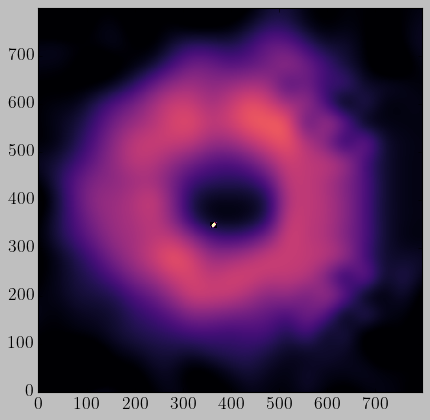

In [1344]:
i = 3
crop = 100
im = IM[i]
h, w = np.shape(im)
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))/4
plt.imshow(im,vmin=vmin,vmax=vmax,origin='lower',interpolation='None')

Let's define the scalebar, arrow, circles, ellipses, boxes, to plot the image nicely

In [1345]:
X_OBJ, Y_OBJ = [85,w//2,w//2,xb-210], [85,h//2,h//2,yb-210]
RAD_CIRC, DX_ARR, DY_ARR = [1,1,1,1], [10,10,10,50], [10,10,10,50]
pixarc = factor*1e-3 #arcsec
A_ELL, B_ELL, PA_ELL =  np.array([a_beam, r_disc_warm*2, r_disc_cold*2])/pixarc, np.array([b_beam, r_disc_warm*np.cos(i_disc_warm)*2,r_disc_cold*np.cos(i_disc_cold)*2])/pixarc, np.array([-PA_beam, -PA_disc_warm, -PA_disc_cold])
arcsec_scalebar = 1 # arcsec
pix_scalebar = arcsec_scalebar/pixarc

# blabla images
text_ref = 'Chauvin et al./ Su et al.'
text_instru1 = INSTRU[0]+' '+BAND[0]+'\n'
text_instru2 ='\n'+INSTRU[1][:-6]+' '+BAND[1]

In [1346]:
B_ELL

array([103.        ,  16.61439624, 373.8239153 ])

In [1347]:
fs = 12
color_b = [1,1,0.5] ; color_alma = [0.9,0.5,0.7]

In [1348]:
band, x_obj, y_obj =  BAND, X_OBJ, Y_OBJ
rad_circ, dx_arr, dy_arr = RAD_CIRC[i], DX_ARR[i], DY_ARR[i]
a_ell, b_ell, pa_ell = A_ELL, B_ELL, PA_ELL
#namesave = '()_overview_system.pdf'.format(nameobject)
vmin, vmax = 0, (np.nanmedian(im)+np.nanmax(im))/3

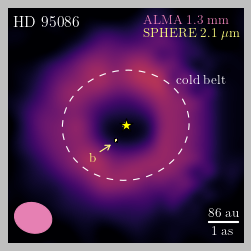

In [1349]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
fig.subplots_adjust(top=0.99,bottom=0.01,left=0.01,right=0.99)

# star
ax.scatter([w//2], [h//2], s=150, c='yellow', marker='*',zorder=10)

ax.imshow(im,origin='lower',vmin=vmin,vmax=vmax,cmap='inferno')
ax.axis('off')

# Name object: top left
text_im = name_object
ax.text(15,h-65,text_im,color='white',fontsize=fs+2)

# Instruments: top right
ax.text(w-340,h-100,text_instru1,color=color_alma,fontsize=fs) 
ax.text(w-340,h-100,text_instru2,color=color_b,fontsize=fs)

# Scalebar: bottom right
scalebar = AnchoredSizeBar(ax.transData, pix_scalebar, '{} as'.format('%.0f'%arcsec_scalebar), 4,label_top=False, pad=0.1, sep=3, borderpad=0.3, frameon=False, size_vertical=4, color='white',fontproperties=fp)
ax.add_artist(scalebar)
ax.text(679,90,'{} au'.format('%.0f'%sep2au(arcsec_scalebar,Object.d_object)),color='white',fontsize=fs)

# Beam: bottom left
ellipse = Ellipse((x_obj[0],y_obj[0]),b_ell[0],a_ell[0],angle=-pa_ell[0],ec=color_alma,fc=color_alma,ls='-',lw=1)
ax.add_patch(ellipse)

# Objects:
# warm belt
ellipse = Ellipse((x_obj[1],y_obj[1]),b_ell[1],a_ell[1],angle=-pa_ell[1],ec='w',fc='None',ls='-',lw=1)
ax.add_patch(ellipse)
#ax.text(x_obj[1]+50,y_obj[1]+50,'warm belt',color='w',fontsize=fs)

# cold belt
ellipse = Ellipse((x_obj[2],y_obj[2]),b_ell[2],a_ell[2],angle=-pa_ell[2],ec='w',fc='None',ls='--',lw=1)
ax.add_patch(ellipse)
ax.text(x_obj[2]+170,y_obj[2]+140,'cold belt',color='w',fontsize=fs)

# exoplanet b
arrowstyle = ArrowStyle.CurveA(head_length=4, head_width=2.5)#, tail_width=4)#,tail_length=4)
arrow = FancyArrowPatch((x_obj[3],y_obj[3]),(x_obj[3]-dx_arr,x_obj[3]-dy_arr),ec=color_b,fc=color_b,arrowstyle=arrowstyle,shrinkA=2.0)#,width=2,joinstyle='round')
ax.add_patch(arrow)
ax.text(x_obj[3]-dx_arr-30,x_obj[3]-dy_arr-30,'b',color=color_b,fontsize=fs,zorder=10)

plt.savefig('HD95086_overview.pdf')
#fig.tight_layout()
plt.show()

In [1172]:
a_ell

array([  0.        ,  19.18465228, 431.65467626])

In [1034]:
PA_ELL

array([ -860582.6082865, -1111538.1225538, -1111538.1225538])

# Filter an image

In [ ]:
i = 0
im = IM[i]

save_filt_im = 1
save_plots   = 1
namesave_im_to_be_filtered = INSTRU[i]
ext_save = '.png'

#### Show the image to filter

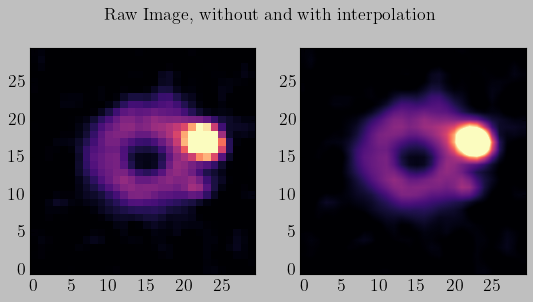

In [276]:
nli,nco = 1,2
vmax = 3e-4
fig, ax = plt.subplots(nli,nco,figsize=(4*nco,4*nli))
fig.suptitle('Raw Image, without and with interpolation')
ax[0].imshow(im,vmin=0,vmax=vmax,origin='lower',interpolation='none')

ax[1].imshow(im,vmin=0,vmax=vmax,origin='lower')

if save_plots :
    plt.savefig(namesave_im_to_be_filtered+'_before_filtering.png')
plt.show()

#### Filter the image

0
0
0


/opt/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


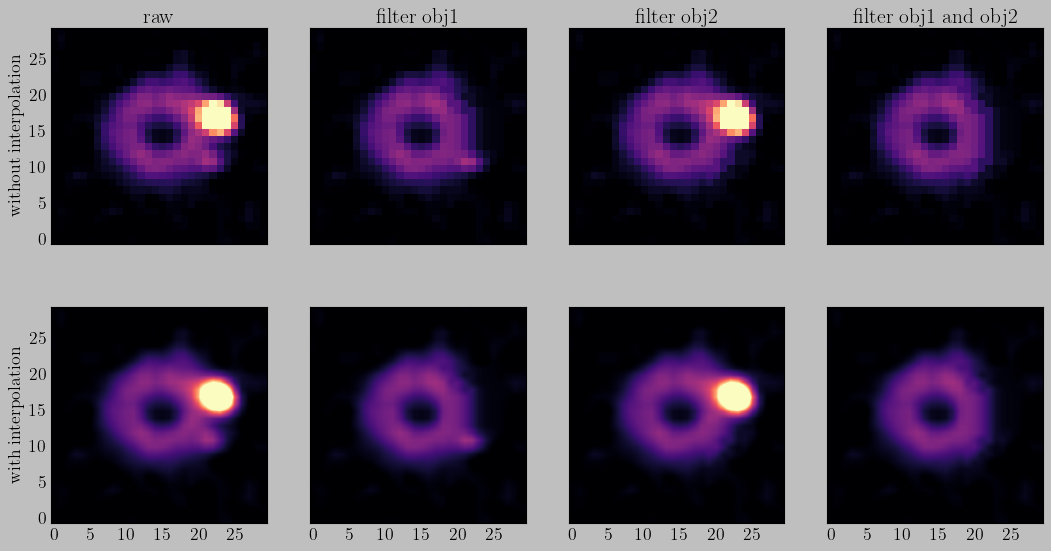

In [277]:
x1, y1, rad1 = 23,17, 5
x2, y2, rad2 = 22,11, 3
X,Y, RAD = [x1,x2], [y1,y2], [rad1, rad2]

nli,nco = 2,4
im_filt1 = filter_circular_zone(im,x1,y1,rad1,dr=1)
im_filt2 = filter_circular_zone(im,x2,y2,rad2,dr=1)
im_filt = filter_circular_zone(im_filt1,x2,y2,rad2,dr=1)

if save_filt_im :
    vip.fits.write_fits('im_filtered',im_filt,verbose=False)

fig, ax = plt.subplots(nli,nco,figsize=(4*nco,4*nli),sharex=True,sharey=True)
for li in range(nli):
    for co in range(nco):
        if 0 : # indicate positions of the contaminating objects
            for i in range(len(X)):
                ax[li,co].scatter([X[i]], [Y[i]], s=100, c='r', marker='+',zorder=10)

                circle = Circle((X[i],Y[i]),RAD[i],ec='w',fc='None',ls='-',lw=1,zorder=10)
                ax[li,co].add_patch(circle)


ax[0,0].set_title('raw')
ax[0,1].set_title('filter obj1')
ax[0,2].set_title('filter obj2')
ax[0,3].set_title('filter obj1 and obj2')

ax[0,0].set_ylabel('without interpolation')
ax[1,0].set_ylabel('with interpolation')

ax[0,0].imshow(im_1,vmin=0,vmax=3e-4,origin='lower',interpolation='none')
ax[0,1].imshow(im_filt1,vmin=0,vmax=3e-4,origin='lower',interpolation='none')
ax[0,2].imshow(im_filt2,vmin=0,vmax=3e-4,origin='lower',interpolation='none')
ax[0,3].imshow(im_filt,vmin=0,vmax=3e-4,origin='lower',interpolation='none')

ax[1,0].imshow(im_1,vmin=0,vmax=3e-4,origin='lower')
ax[1,1].imshow(im_filt1,vmin=0,vmax=3e-4,origin='lower')
ax[1,2].imshow(im_filt2,vmin=0,vmax=3e-4,origin='lower')
ax[1,3].imshow(im_filt,vmin=0,vmax=3e-4,origin='lower')

if save_plots :
    plt.savefig(namesave_im_to_be_filtered+'_filtering.png')
plt.show()

#### Display the azimuthal median image model

0


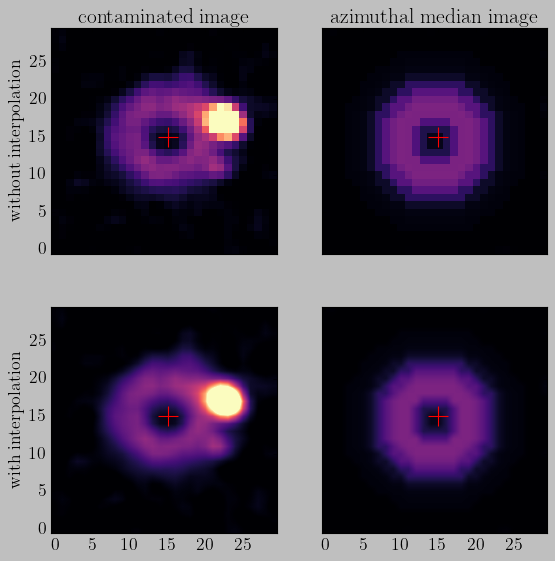

In [278]:
x0, y0, rad0 = 15,15, 15
nli,nco = 2,2
im_filt = filter_circular_zone(im_1,x0,y0,rad0,dr=1)

fig, ax = plt.subplots(nli,nco,figsize=(8,8),sharex=True,sharey=True)
for li in range(nli):
    for co in range(nco):
        
        ax[co,li].scatter([x0], [y0], s=300, c='red', marker='+',zorder=10)
        
        circle = Circle((x0,y0),rad0,ec='red',fc='None',ls='-',lw=1,zorder=10)
        #ax[co,li].add_patch(circle)
        
ax[0,0].set_title('contaminated image')
ax[0,1].set_title('azimuthal median image')

ax[0,0].set_ylabel('without interpolation')
ax[1,0].set_ylabel('with interpolation')

ax[0,0].imshow(im_1,vmin=0,vmax=3e-4,origin='lower',interpolation='none')
ax[0,1].imshow(im_filt,vmin=0,vmax=3e-4,origin='lower',interpolation='none')
ax[1,0].imshow(im_1,vmin=0,vmax=3e-4,origin='lower')#,interpolation='none')
ax[1,1].imshow(im_filt,vmin=0,vmax=3e-4,origin='lower')#,interpolation='none')

if save_plots :
    plt.savefig(namesave_im_to_be_filtered+'_azimuthal_median_image.png')
plt.show()

In [445]:
R_IWA

NameError: name 'R_IWA' is not defined